<a href="https://colab.research.google.com/github/Maruf1904002/SRCNN/blob/main/Improved_SRCNN_with_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1
!pip install tensorflow tensorboardX
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Conv2D, Input, Add, PReLU, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
from tensorflow.image import ssim
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.metrics import structural_similarity as compare_ssim


In [4]:
#3
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add, PReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.image import ssim

# Custom SSIM + MSE loss for RGB images
def ssim_mse_loss(y_true, y_pred):
    ssim_loss = 1 - tf.reduce_mean(ssim(y_true, y_pred, max_val=1.0))
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return 0.7 * ssim_loss + 0.3 * mse_loss

# Improved SRCNN Architecture
def improved_srcnn():
    inputs = Input(shape=(None, None, 1))  # Grayscale input

    x = Conv2D(64, (9, 9), padding='same')(inputs)
    # x = BatchNormalization()(x)
    x = PReLU(shared_axes=[1, 2])(x)

    for _ in range(2):  # 2 Residual Blocks
        res = Conv2D(64, (3, 3), padding='same')(x)
        # res = BatchNormalization()(res)
        res = PReLU(shared_axes=[1, 2])(res)
        res = Conv2D(64, (3, 3), padding='same')(res)
        # res = BatchNormalization()(res)
        x = Add()([x, res])
        x = PReLU(shared_axes=[1, 2])(x)
        # x = Dropout(0.3)(x)

    outputs = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)  # RGB output

    model = Model(inputs, outputs)
    optimizer = Adam(learning_rate=0.5, decay=0)
    model.compile(optimizer=optimizer, loss=ssim_mse_loss, metrics=['mse'])
    return model

# Instantiate and summarize
model = improved_srcnn()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 1)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │      5,248 │ input_layer[0][0] │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu (PReLU)     │ (None, None,      │         64 │ conv2d[0][0]      │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │     36,928 │ p_re_lu[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_1 (PReLU)   │ (None, None,      │         64 │ conv2d_1[0][0]    │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     36,928 │ p_re_lu_1[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ p_re_lu[0][0],    │
│                     │ None, 64)         │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_2 (PReLU)   │ (None, None,      │         64 │ add[0][0]         │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │     36,928 │ p_re_lu_2[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_3 (PReLU)   │ (None, None,      │         64 │ conv2d_3[0][0]    │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │     36,928 │ p_re_lu_3[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None,      │          0 │ p_re_lu_2[0][0],  │
│                     │ None, 64)         │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_4 (PReLU)   │ (None, None,      │         64 │ add_1[0][0]       │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, None,      │        577 │ p_re_lu_4[0][0]   │
│                     │ None, 1)          │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 153,857 (601.00 KB)

 Trainable params: 153,857 (601.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#4
import os
import zipfile
import tensorflow as tf

# Paths to zip files in Drive
zip_hr = '/content/drive/MyDrive/DIV2K_Patches/patches_HR.zip'
zip_lr = '/content/drive/MyDrive/DIV2K_Patches/patches_LR.zip'

# Extract folders if not already done
if not os.path.exists('/content/DIV2K_HR'):
    with zipfile.ZipFile(zip_hr, 'r') as zip_ref:
        zip_ref.extractall('/content/DIV2K_HR')
if not os.path.exists('/content/DIV2K_LR'):
    with zipfile.ZipFile(zip_lr, 'r') as zip_ref:
        zip_ref.extractall('/content/DIV2K_LR')

print("✅ ZIPs extracted")

# Set dataset paths
hr_path = '/content/DIV2K_HR/patches_HR'
lr_path = '/content/DIV2K_LR/patches_LR'

# Get sorted file names (assumes matching order)
hr_files = sorted([os.path.join(hr_path, f) for f in os.listdir(hr_path) if f.endswith('.png')])
lr_files = sorted([os.path.join(lr_path, f) for f in os.listdir(lr_path) if f.endswith('.png')])

# Split into training and validation
split = int(len(hr_files) * 0.9)
train_hr_files, val_hr_files = hr_files[:split], hr_files[split:]
train_lr_files, val_lr_files = lr_files[:split], lr_files[split:]

# Resize shape (match to what your model expects — 96x96 recommended)
resize_shape = [96, 96]

# Function to load and resize both LR and HR to same shape
def load_image_pair(lr_path, hr_path):
    lr_img = tf.io.read_file(lr_path)
    lr_img = tf.image.decode_png(lr_img, channels=1)
    lr_img = tf.image.convert_image_dtype(lr_img, tf.float32)
    lr_img = tf.image.resize(lr_img, resize_shape)

    hr_img = tf.io.read_file(hr_path)
    hr_img = tf.image.decode_png(hr_img, channels=1)
    hr_img = tf.image.convert_image_dtype(hr_img, tf.float32)
    hr_img = tf.image.resize(hr_img, resize_shape)

    return lr_img, hr_img

# Slice training data before dataset is created
train_hr_files = train_hr_files[:50000]
train_lr_files = train_lr_files[:50000]

# ✅ Add this to limit validation time
val_hr_files = val_hr_files[:40000]
val_lr_files = val_lr_files[:40000]

# Build TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_lr_files, train_hr_files))
train_ds = train_ds.map(load_image_pair).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_lr_files, val_hr_files))
val_ds = val_ds.map(load_image_pair).batch(32).prefetch(tf.data.AUTOTUNE)

print(f"✅ Prepared {len(train_hr_files)} training pairs, {len(val_hr_files)} validation pairs")


✅ ZIPs extracted
✅ Prepared 50000 training pairs, 33329 validation pairs


In [13]:
import os

print("HR files:", os.listdir('/content/DIV2K_HR')[:5])
print("LR files:", os.listdir('/content/DIV2K_LR')[:5])


HR files: ['patches_HR']
LR files: ['patches_LR']


In [6]:
#5
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau

# Set up callbacks
log_dir = "/content/logs"  # Save logs locally (faster than Drive)
# tensorboard_cb = TensorBoard(log_dir=log_dir)
tensorboard_cb = TensorBoard(log_dir=log_dir, write_graph=False, write_images=False)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=2, min_lr=1e-4, verbose=1)

# Run training (safe config for 50 epoch)
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=50,
                    callbacks=[lr_scheduler])

# Save locally (quick, safe)
model.save("improved_srcnn_local.h5")

print("✅ Training + model save completed.")


Epoch 1/50


KeyboardInterrupt: 

In [7]:
#6
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
PSNR: 3.235076


Exception ignored in: <function _xla_gc_callback at 0x7b03f4c9f100>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


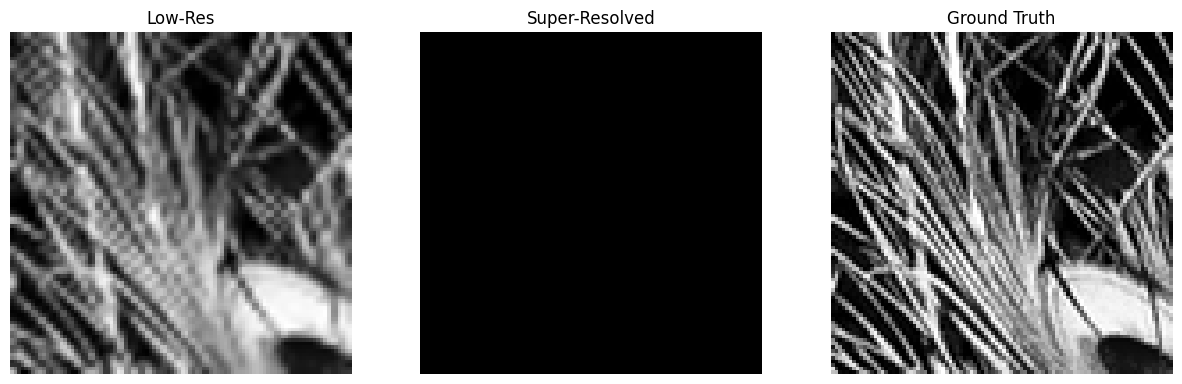

In [8]:
# Block 7: PSNR + Visual Output

def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0).numpy()

# Get 1 sample from validation set
for lr_batch, hr_batch in val_ds.take(1):
    sample_lr = lr_batch[0:1]      # (1, H, W, 1)
    sample_hr = hr_batch[0]        # (H, W, 1)

sample_sr = model.predict(sample_lr)[0]  # (H, W, 1)

print("PSNR:", psnr(sample_hr, sample_sr))

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(sample_lr[0, :, :, 0], cmap='gray')
axs[0].set_title("Low-Res")
axs[1].imshow(sample_sr[:, :, 0], cmap='gray')
axs[1].set_title("Super-Resolved")
axs[2].imshow(sample_hr[:, :, 0], cmap='gray')
axs[2].set_title("Ground Truth")
for ax in axs: ax.axis('off')
plt.show()


In [9]:
#8
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.image import ssim

# Evaluation function (already working)
def evaluate_metrics_on_validation(val_ds, model):
    psnr_list, ssim_list = [], []

    for lr_batch, hr_batch in val_ds:
        for i in range(lr_batch.shape[0]):
            lr_img = tf.expand_dims(lr_batch[i], axis=0)
            hr_img = hr_batch[i]
            sr_img = model.predict(lr_img, verbose=0)[0]

            psnr_val = tf.image.psnr(hr_img, sr_img, max_val=1.0).numpy()
            ssim_val = ssim(hr_img, sr_img, max_val=1.0).numpy()

            psnr_list.append(psnr_val)
            ssim_list.append(ssim_val)

    return psnr_list, ssim_list

# Run and store
psnr_scores, ssim_scores = evaluate_metrics_on_validation(val_ds, model)

# Convert to NumPy for stats and plotting
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

# --- PLOT LINE GRAPHS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(psnr_scores, label='PSNR', color='tab:blue')
plt.xlabel("Image Index")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Across Validation Set")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(ssim_scores, label='SSIM', color='tab:green')
plt.xlabel("Image Index")
plt.ylabel("SSIM")
plt.title("SSIM Across Validation Set")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- PLOT BOXPLOTS ---
plt.figure(figsize=(6, 5))
plt.boxplot([psnr_scores, ssim_scores], labels=['PSNR', 'SSIM'])
plt.title("Distribution of PSNR and SSIM")
plt.grid(True)
plt.show()

# --- SUMMARY STATS ---
print(f"📊 PSNR - Mean: {psnr_scores.mean():.2f}, Max: {psnr_scores.max():.2f}, Min: {psnr_scores.min():.2f}")
print(f"📊 SSIM - Mean: {ssim_scores.mean():.4f}, Max: {ssim_scores.max():.4f}, Min: {ssim_scores.min():.4f}")


KeyboardInterrupt: 

In [10]:
#9
results_df = pd.DataFrame({
    'Image #': list(range(1, len(psnr_scores) + 1)),
    'PSNR': np.round(psnr_scores, 3),
    'SSIM': np.round(ssim_scores, 3)
})
display(results_df)
results_df.to_csv("/content/drive/MyDrive/DIV2K/validation_metrics.csv", index=False)


NameError: name 'psnr_scores' is not defined

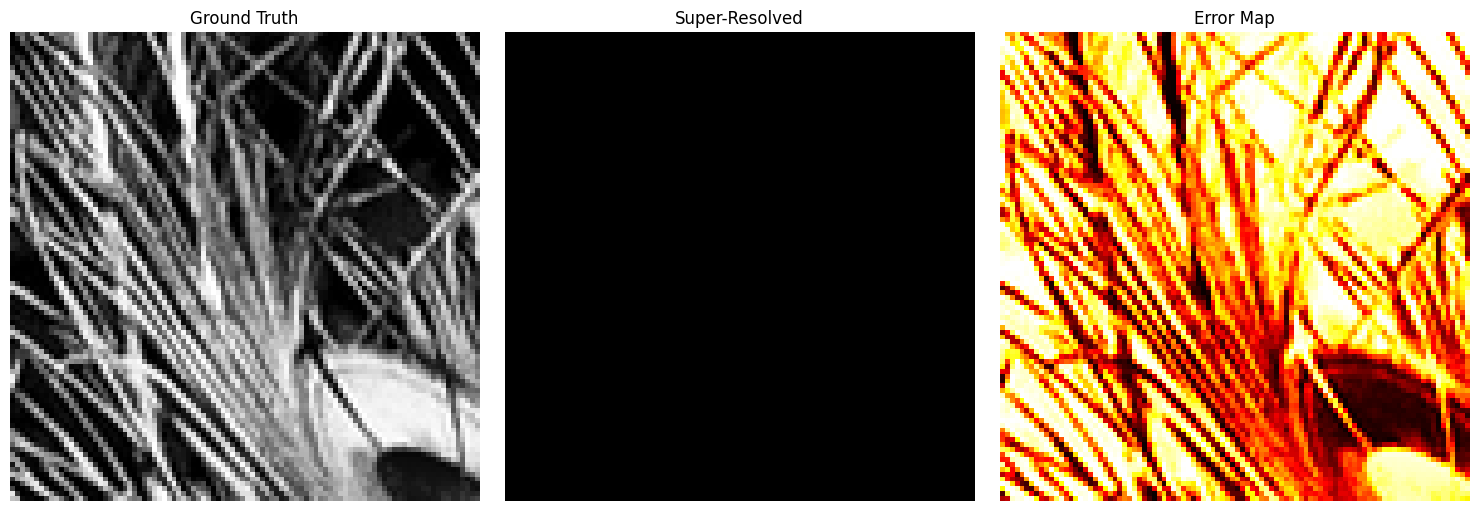

In [12]:
#10
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Get one sample from val_ds
for lr_batch, hr_batch in val_ds.take(1):
    lr_img = tf.expand_dims(lr_batch[0], axis=0)  # (1, H, W, 1)
    hr_img = hr_batch[0]                          # (H, W, 1)

# Predict
sr_img = model.predict(lr_img, verbose=0)[0]      # (H, W, 1)

# Compute error map
error_map = np.abs(hr_img.numpy() - sr_img)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(hr_img[:, :, 0], cmap='gray')
plt.title("Ground Truth")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sr_img[:, :, 0], cmap='gray')
plt.title("Super-Resolved")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(error_map[:, :, 0], cmap='hot')
plt.title("Error Map")
plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
#11
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

# Convert to NumPy (required by skimage)
hr_np = hr_img.numpy()[:, :, 0]
sr_np = sr_img[:, :, 0]  # Already NumPy from model.predict()

# Compute SSIM and get the full SSIM map
ssim_score, ssim_map = compare_ssim(hr_np, sr_np, full=True, data_range=1.0)


# Plot SSIM heatmap
plt.figure(figsize=(6, 5))
plt.imshow(ssim_map, cmap='viridis')
plt.title(f"SSIM Heatmap (score: {ssim_score:.4f})")
plt.axis('off')
plt.colorbar()
plt.tight_layout()
plt.show()


NameError: name 'hr_img' is not defined